<a href="https://colab.research.google.com/github/gourimenon8/Python_project/blob/main/Salaries_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
# df = pd.read_csv('salaries.csv')
# # df = pd.read_excel('grades.xlsx', sheet_name = 'Period 5', delimiter='\t', skiprows=9)
# print(df.info())
# df.head()

In [ ]:
import sqlite3
import csv

# Connect to SQLite database
conn = sqlite3.connect('salaries.db')
cursor = conn.cursor()

# Create tables with full forms
cursor.execute('''
CREATE TABLE IF NOT EXISTS ExperienceLevel (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    experience_level TEXT UNIQUE,
    full_form TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS EmploymentType (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    employment_type TEXT UNIQUE,
    full_form TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS JobTitle (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    job_title TEXT UNIQUE
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS EmployeeResidence (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    employee_residence TEXT UNIQUE
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS RemoteRatio (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    remote_ratio INTEGER UNIQUE
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS CompanyLocation (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    company_location TEXT UNIQUE
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS CompanySize (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    company_size TEXT UNIQUE,
    full_form TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Salaries (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    work_year INTEGER,
    experience_level_id INTEGER,
    employment_type_id INTEGER,
    job_title_id INTEGER,
    salary INTEGER,
    salary_currency TEXT,
    salary_in_usd INTEGER,
    employee_residence_id INTEGER,
    remote_ratio_id INTEGER,
    company_location_id INTEGER,
    company_size_id INTEGER,
    FOREIGN KEY (experience_level_id) REFERENCES ExperienceLevel (id),
    FOREIGN KEY (employment_type_id) REFERENCES EmploymentType (id),
    FOREIGN KEY (job_title_id) REFERENCES JobTitle (id),
    FOREIGN KEY (employee_residence_id) REFERENCES EmployeeResidence (id),
    FOREIGN KEY (remote_ratio_id) REFERENCES RemoteRatio (id),
    FOREIGN KEY (company_location_id) REFERENCES CompanyLocation (id),
    FOREIGN KEY (company_size_id) REFERENCES CompanySize (id)
)
''')

In [ ]:
# Helper function to insert or get id from a table with full forms
def insert_or_get_id(cursor, table, column, value, full_form=None):
    cursor.execute(f"SELECT id FROM {table} WHERE {column} = ?", (value,))
    row = cursor.fetchone()
    if row:
        return row[0]
    if full_form:
        cursor.execute(f"INSERT INTO {table} ({column}, full_form) VALUES (?, ?)", (value, full_form))
    else:
        cursor.execute(f"INSERT INTO {table} ({column}) VALUES (?)", (value,))
    return cursor.lastrowid

# Define full forms for relevant columns
experience_level_full_forms = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive-level'
}

employment_type_full_forms = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

company_size_full_forms = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Insert unique values into individual tables
with open('salaries.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        experience_level_id = insert_or_get_id(cursor, 'ExperienceLevel', 'experience_level', row['experience_level'], experience_level_full_forms.get(row['experience_level']))
        employment_type_id = insert_or_get_id(cursor, 'EmploymentType', 'employment_type', row['employment_type'], employment_type_full_forms.get(row['employment_type']))
        job_title_id = insert_or_get_id(cursor, 'JobTitle', 'job_title', row['job_title'])
        employee_residence_id = insert_or_get_id(cursor, 'EmployeeResidence', 'employee_residence', row['employee_residence'])
        remote_ratio_id = insert_or_get_id(cursor, 'RemoteRatio', 'remote_ratio', row['remote_ratio'])
        company_location_id = insert_or_get_id(cursor, 'CompanyLocation', 'company_location', row['company_location'])
        company_size_id = insert_or_get_id(cursor, 'CompanySize', 'company_size', row['company_size'], company_size_full_forms.get(row['company_size']))

        cursor.execute('''
            INSERT INTO Salaries (
                work_year, experience_level_id, employment_type_id, job_title_id, salary,
                salary_currency, salary_in_usd, employee_residence_id, remote_ratio_id,
                company_location_id, company_size_id
            ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (
            row['work_year'], experience_level_id, employment_type_id, job_title_id,
            row['salary'], row['salary_currency'], row['salary_in_usd'],
            employee_residence_id, remote_ratio_id, company_location_id, company_size_id
        ))

# Commit the changes and close the connection
conn.commit()
conn.close()

In [ ]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('salaries.db')

# SQL query with JOINs to fetch the data
query = '''
SELECT
    s.id,
    s.work_year,
    e.experience_level,
    e.full_form AS experience_level_full_form,
    et.employment_type,
    et.full_form AS employment_type_full_form,
    j.job_title,
    s.salary,
    s.salary_currency,
    s.salary_in_usd,
    er.employee_residence,
    rr.remote_ratio,
    cl.company_location,
    cs.company_size,
    cs.full_form AS company_size_full_form
FROM
    Salaries s
JOIN
    ExperienceLevel e ON s.experience_level_id = e.id
JOIN
    EmploymentType et ON s.employment_type_id = et.id
JOIN
    JobTitle j ON s.job_title_id = j.id
JOIN
    EmployeeResidence er ON s.employee_residence_id = er.id
JOIN
    RemoteRatio rr ON s.remote_ratio_id = rr.id
JOIN
    CompanyLocation cl ON s.company_location_id = cl.id
JOIN
    CompanySize cs ON s.company_size_id = cs.id
'''

# Load data into Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()


In [ ]:
df.head()

,id,work_year,experience_level,experience_level_full_form,employment_type,employment_type_full_form,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_full_form
0,1,2024,SE,Senior-level,FT,Full-time,AI Engineer,202730,USD,202730,US,0,US,M,Medium
1,2,2024,SE,Senior-level,FT,Full-time,AI Engineer,92118,USD,92118,US,0,US,M,Medium
2,3,2024,SE,Senior-level,FT,Full-time,Data Engineer,130500,USD,130500,US,0,US,M,Medium
3,4,2024,SE,Senior-level,FT,Full-time,Data Engineer,96000,USD,96000,US,0,US,M,Medium
4,5,2024,SE,Senior-level,FT,Full-time,Machine Learning Engineer,190000,USD,190000,US,0,US,M,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          16534 non-null  int64 
 1   work_year                   16534 non-null  int64 
 2   experience_level            16534 non-null  object
 3   experience_level_full_form  16534 non-null  object
 4   employment_type             16534 non-null  object
 5   employment_type_full_form   16534 non-null  object
 6   job_title                   16534 non-null  object
 7   salary                      16534 non-null  int64 
 8   salary_currency             16534 non-null  object
 9   salary_in_usd               16534 non-null  int64 
 10  employee_residence          16534 non-null  object
 11  remote_ratio                16534 non-null  int64 
 12  company_location            16534 non-null  object
 13  company_size                16534 non-null  ob

In [ ]:
df.columns

Index(['id', 'work_year', 'experience_level', 'experience_level_full_form',
       'employment_type', 'employment_type_full_form', 'job_title', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'company_size_full_form'],
      dtype='object')

In [ ]:
df['experience_level'].value_counts().head()

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

In [ ]:
# df['company_location'].value_counts().head()

In [ ]:
# #Filtering only US data, since most belong to US
# filtered_df = df[(df['employee_residence'] == 'US') & (df['company_location'] == 'US')]

# from sklearn.model_selection import train_test_split

# # Assuming 'salary_in_usd' is the target variable
# X = filtered_df[['work_year', 'experience_level', 'employment_type',
#        'salary_currency', 'employee_residence', 'remote_ratio',
#        'company_location', 'company_size']]
# y = filtered_df['salary_in_usd']

# # Perform train/test split without stratification
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

relevant_columns = ['work_year', 'experience_level', 'employment_type',
       'salary_currency', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'salary_in_usd', ]

df = df[relevant_columns]

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11573 entries, 14159 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           11573 non-null  int64 
 1   experience_level    11573 non-null  object
 2   employment_type     11573 non-null  object
 3   salary_currency     11573 non-null  object
 4   employee_residence  11573 non-null  object
 5   remote_ratio        11573 non-null  int64 
 6   company_location    11573 non-null  object
 7   company_size        11573 non-null  object
 8   salary_in_usd       11573 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 904.1+ KB
None


,work_year,experience_level,employment_type,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
14159,2023,MI,FT,USD,US,100,US,M,151410
4339,2024,MI,FT,USD,US,0,US,L,111600
8293,2023,SE,FT,USD,US,0,US,M,130000
9320,2023,MI,FT,USD,US,0,US,M,78000
6494,2023,SE,FT,USD,US,0,US,M,132500


In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 36.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=467cf7fa41e8c979daab28ed48634a1bfc51773d7811f64fc04fa4d98b1337ee
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

# Generate profile report for train data
profile = ProfileReport(train, title='Train Data Profile Report', explorative=True)
profile.to_file("train_data_profile_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlation Heatmap

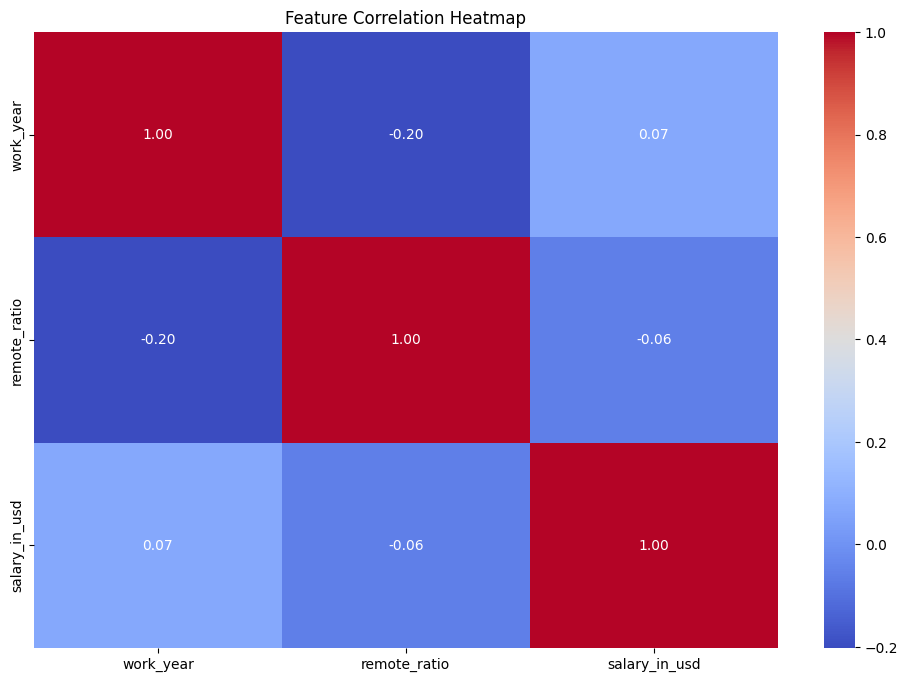

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Selecting only numerical columns for correlation matrix
numerical_data = train.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

%matplotlib inline
plt.show()

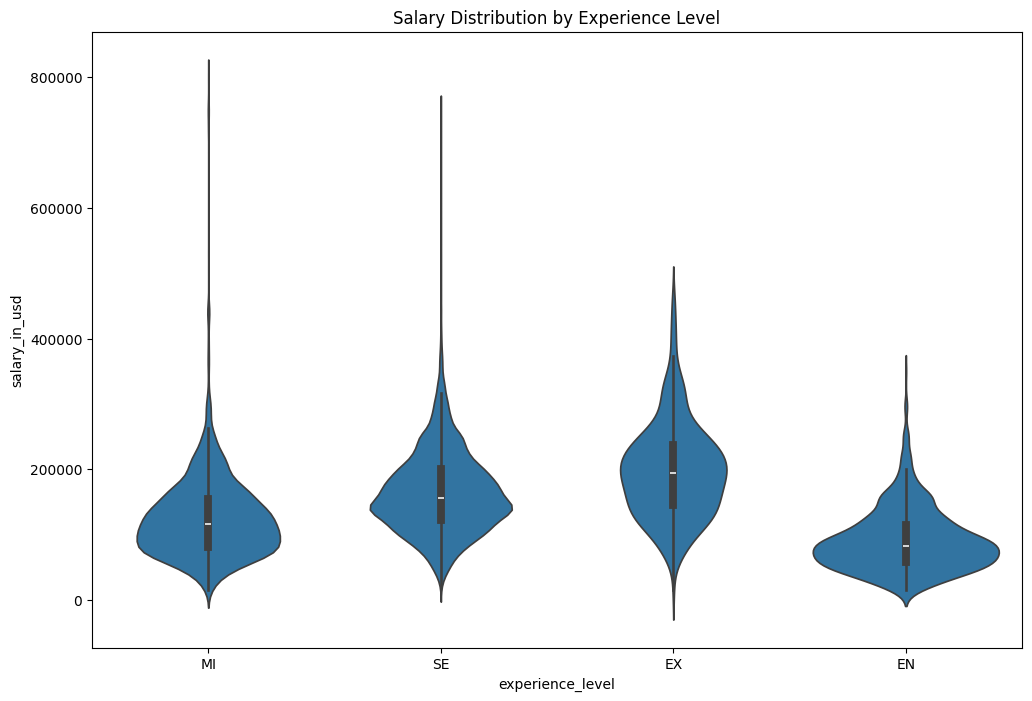

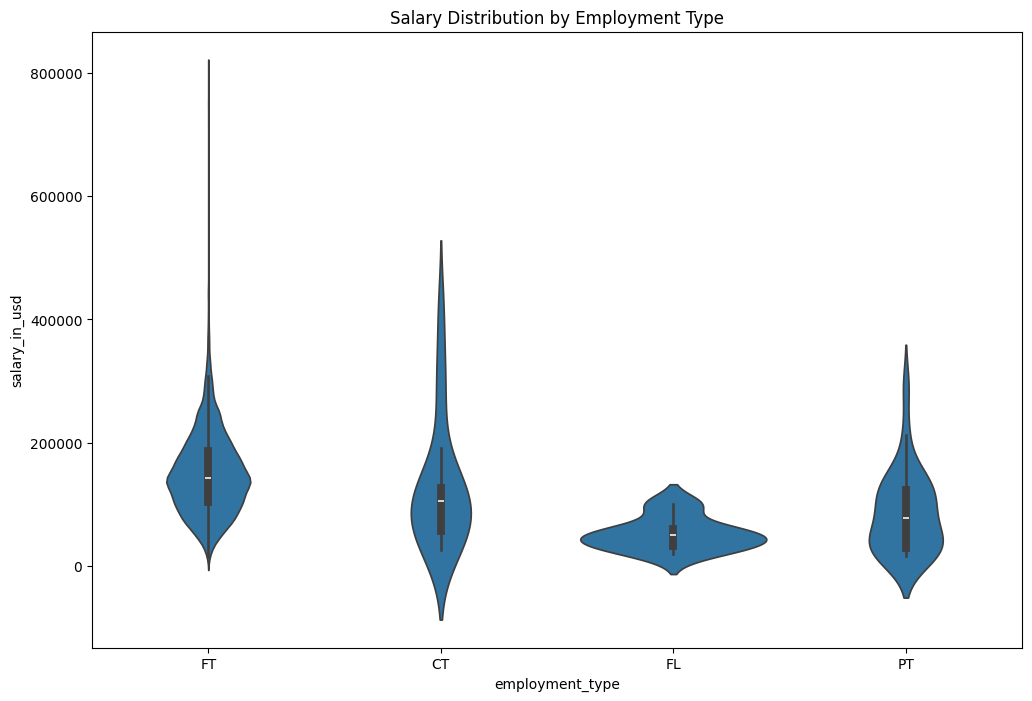

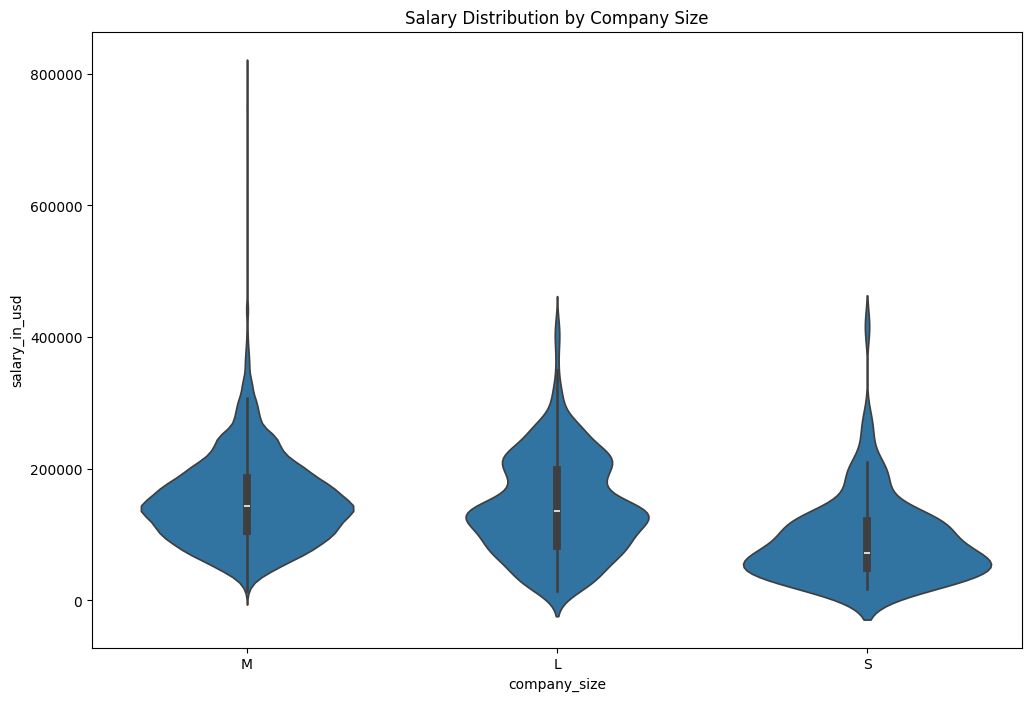

In [ ]:
# Violin plot for Experience Level
plt.figure(figsize=(12, 8))
sns.violinplot(x=train['experience_level'], y=train['salary_in_usd'])
plt.title('Salary Distribution by Experience Level')
plt.show()

# Violin plot for Employment Type
plt.figure(figsize=(12, 8))
sns.violinplot(x=train['employment_type'], y=train['salary_in_usd'])
plt.title('Salary Distribution by Employment Type')
plt.show()

# Violin plot for Company Size
plt.figure(figsize=(12, 8))
sns.violinplot(x=train['company_size'], y=train['salary_in_usd'])
plt.title('Salary Distribution by Company Size')
plt.show()


In [ ]:
train.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary_currency',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'salary_in_usd'],
      dtype='object')

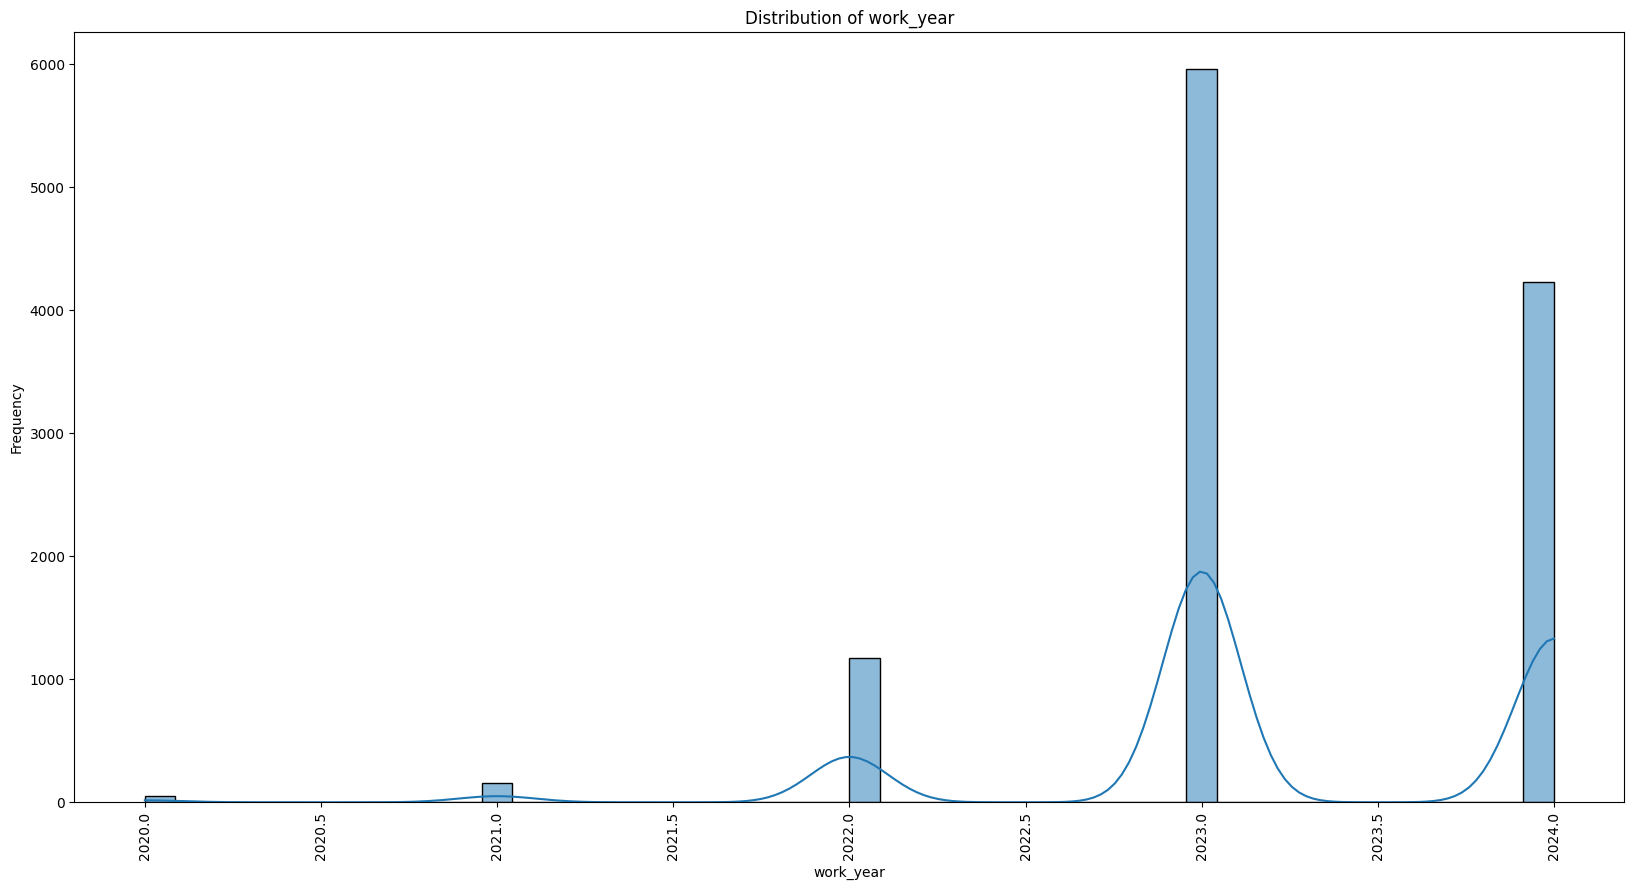

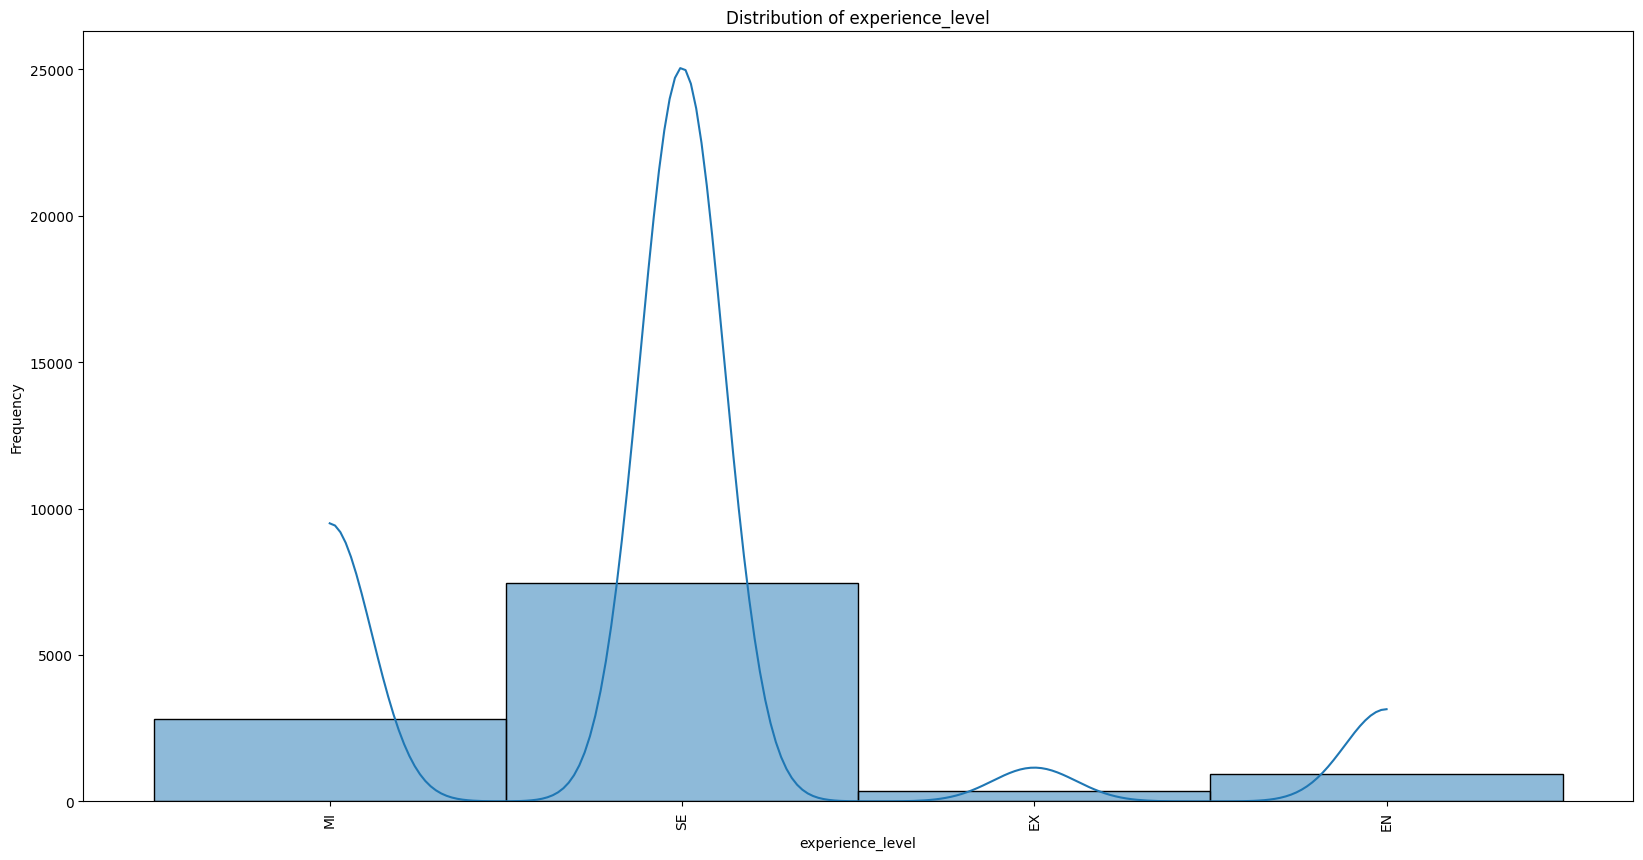

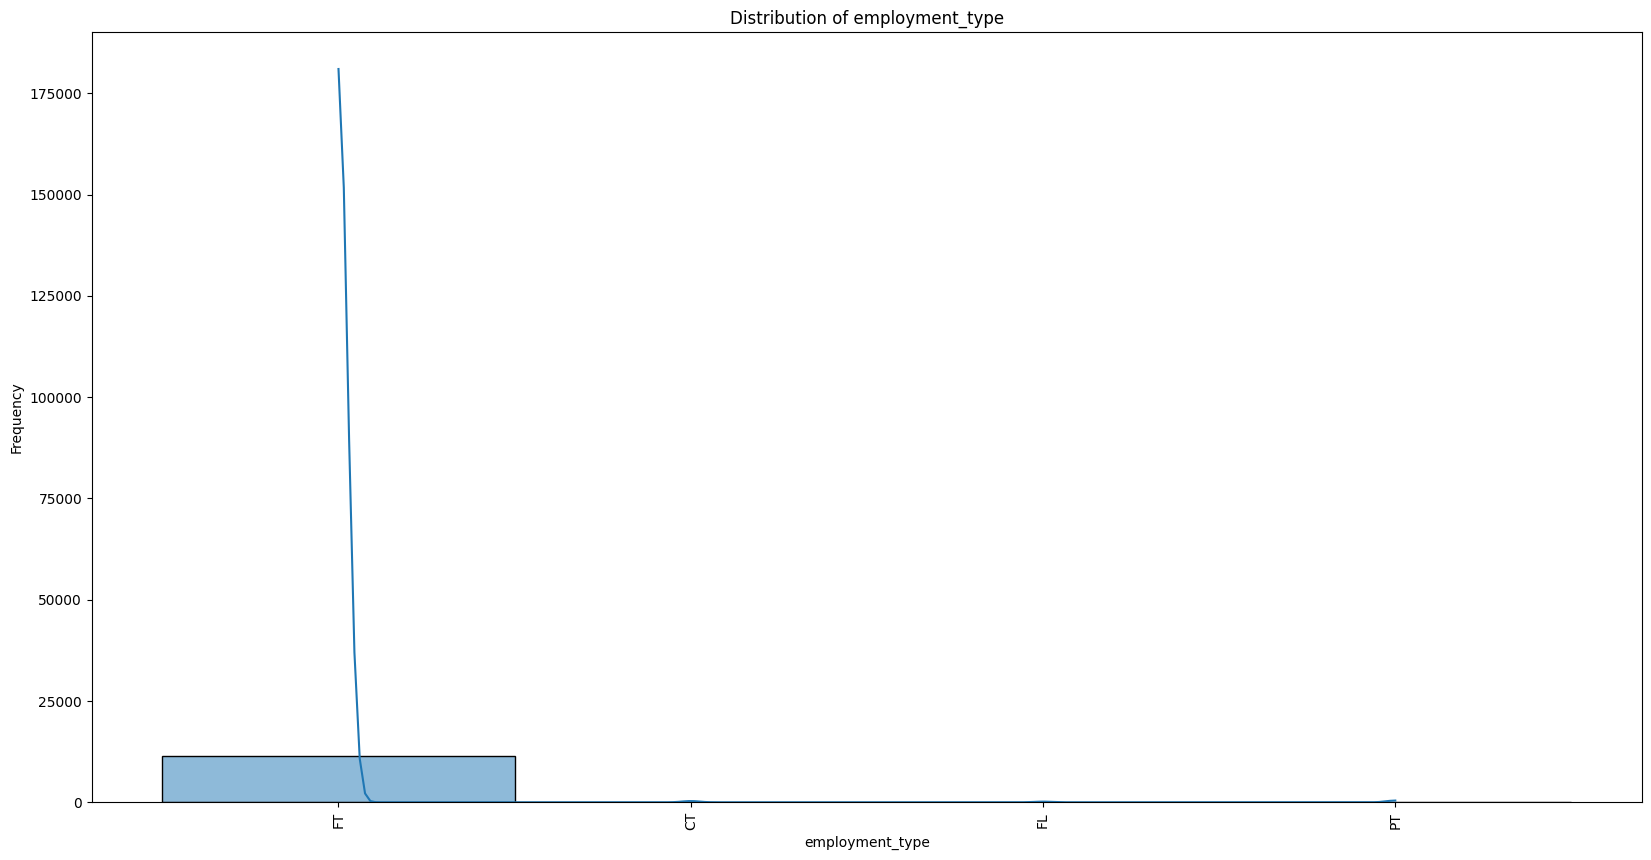

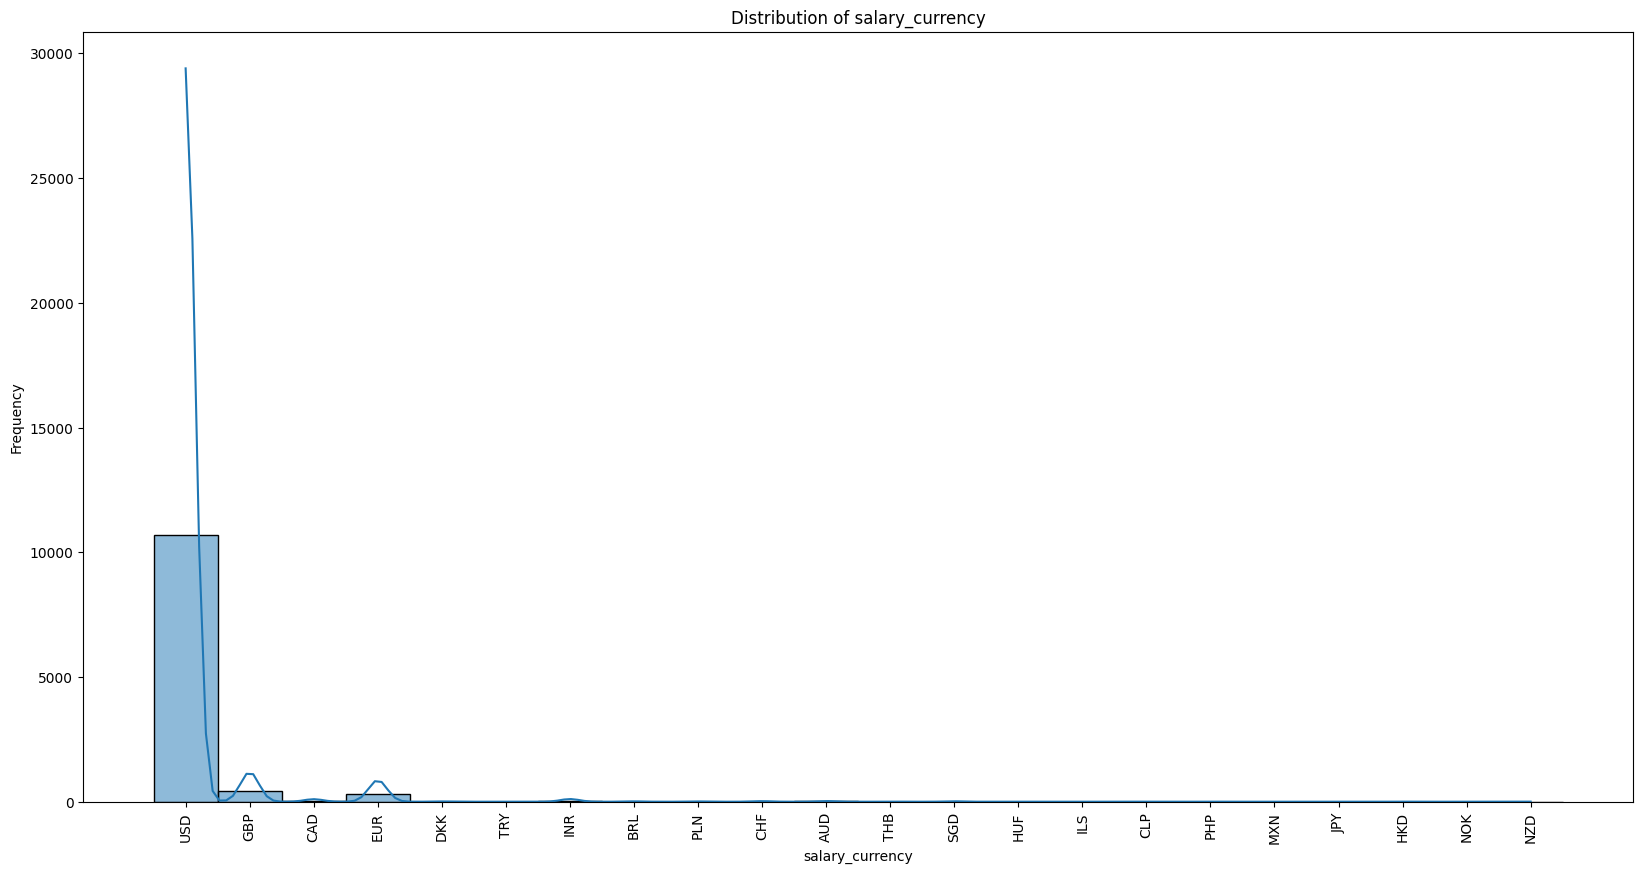

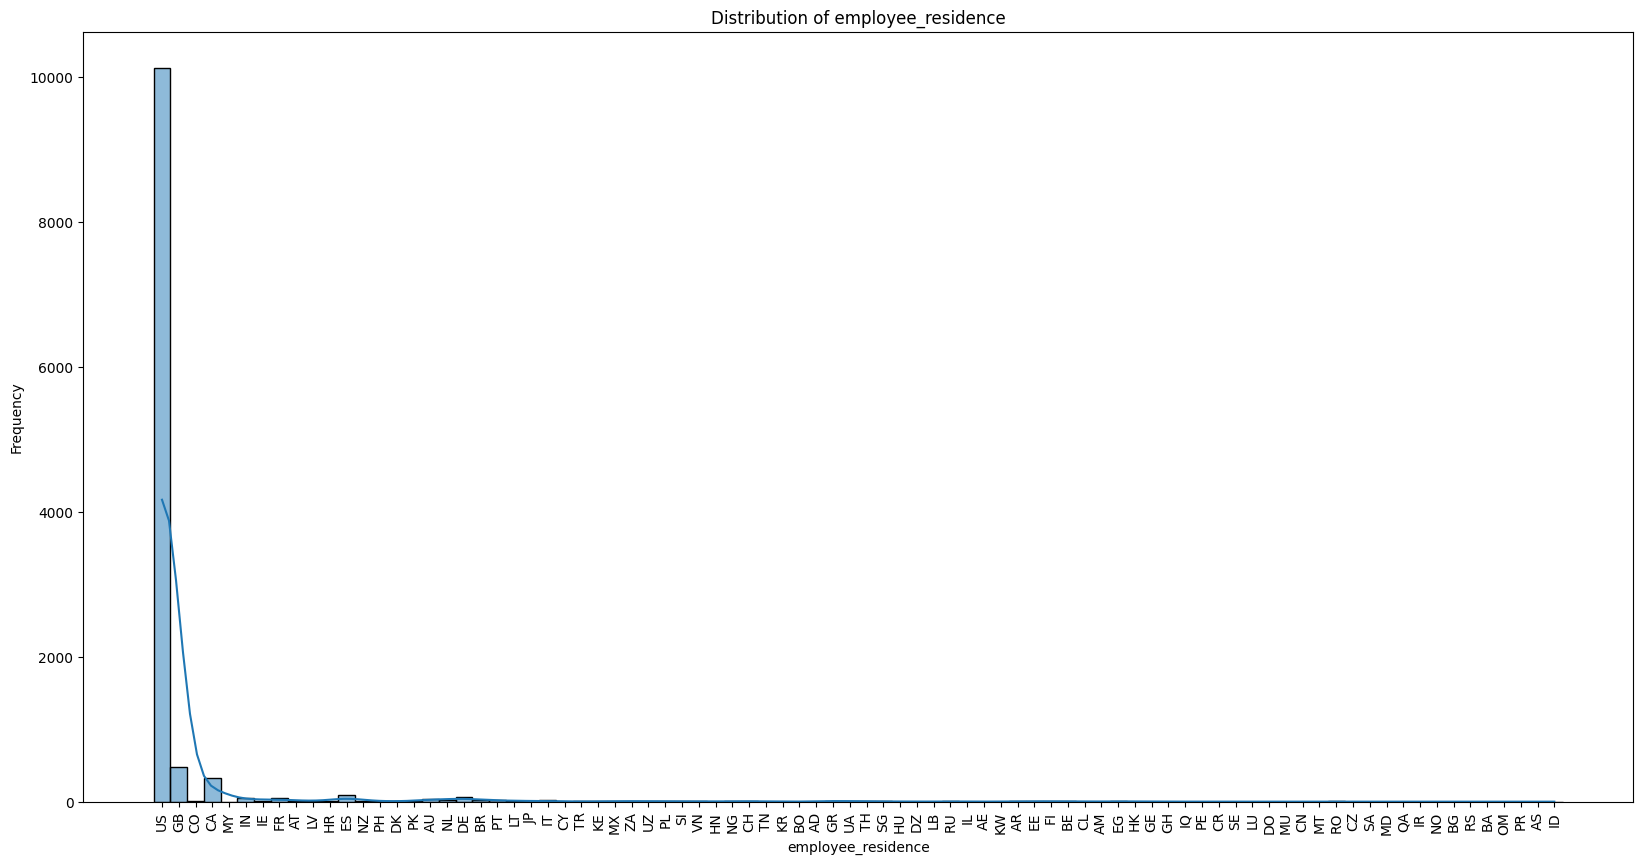

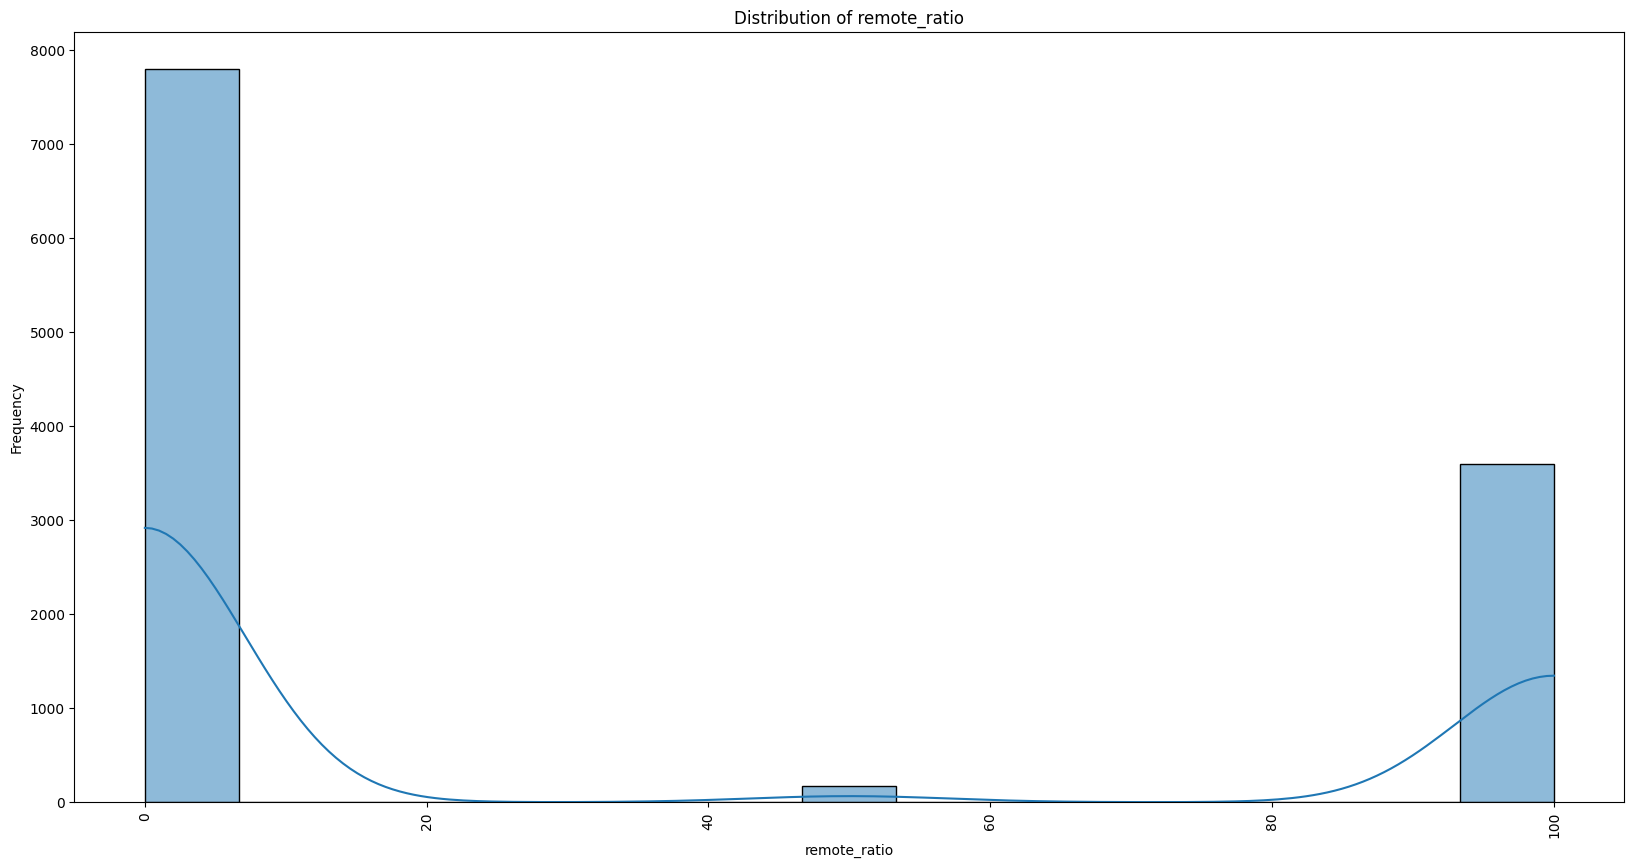

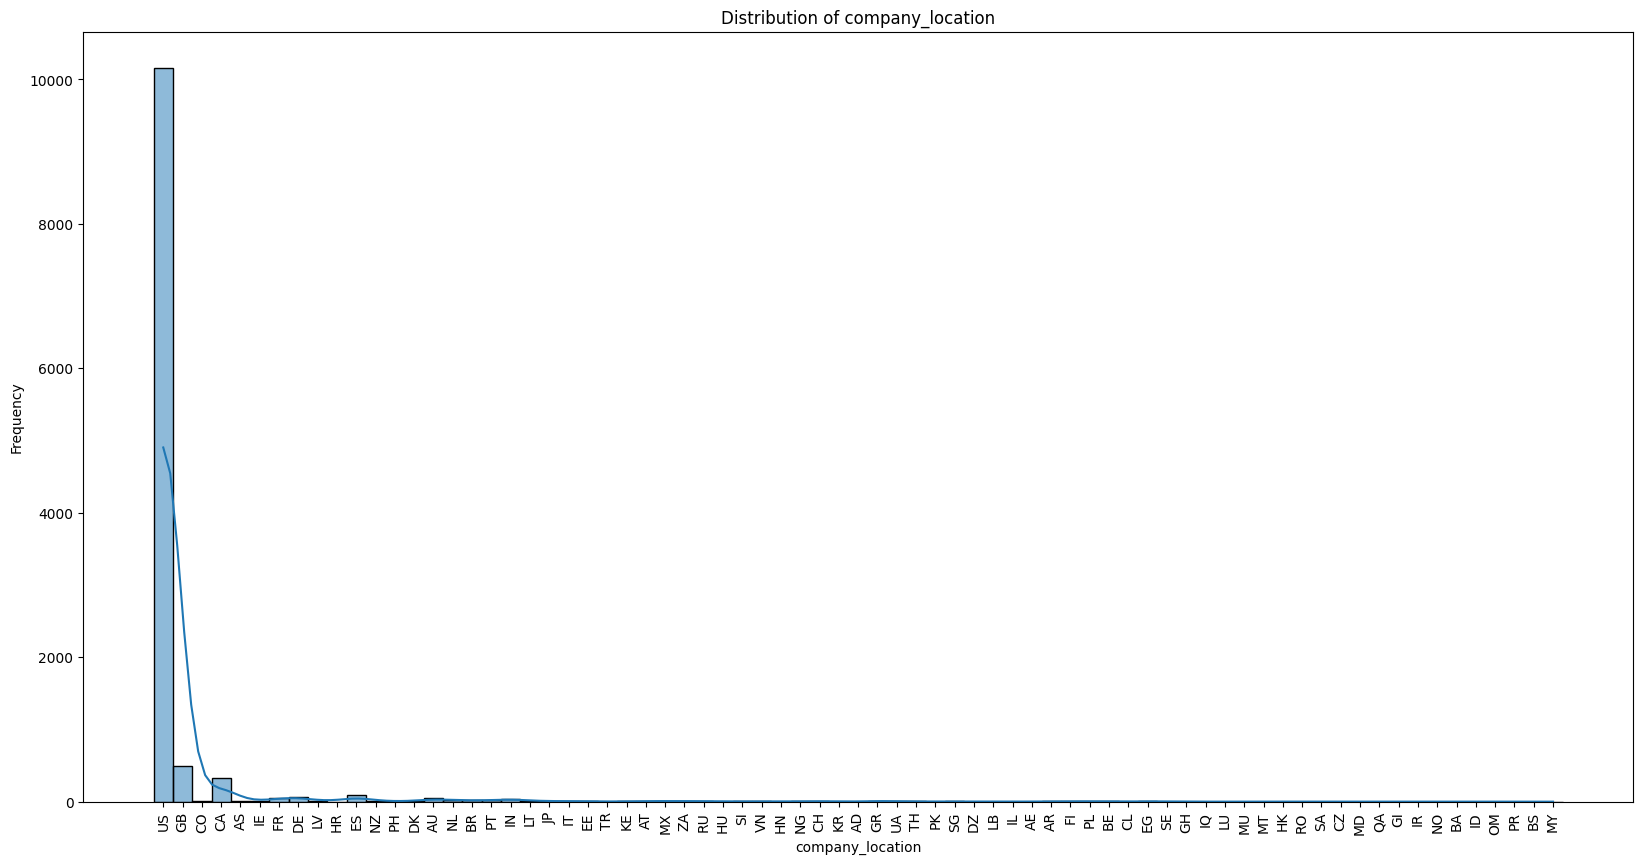

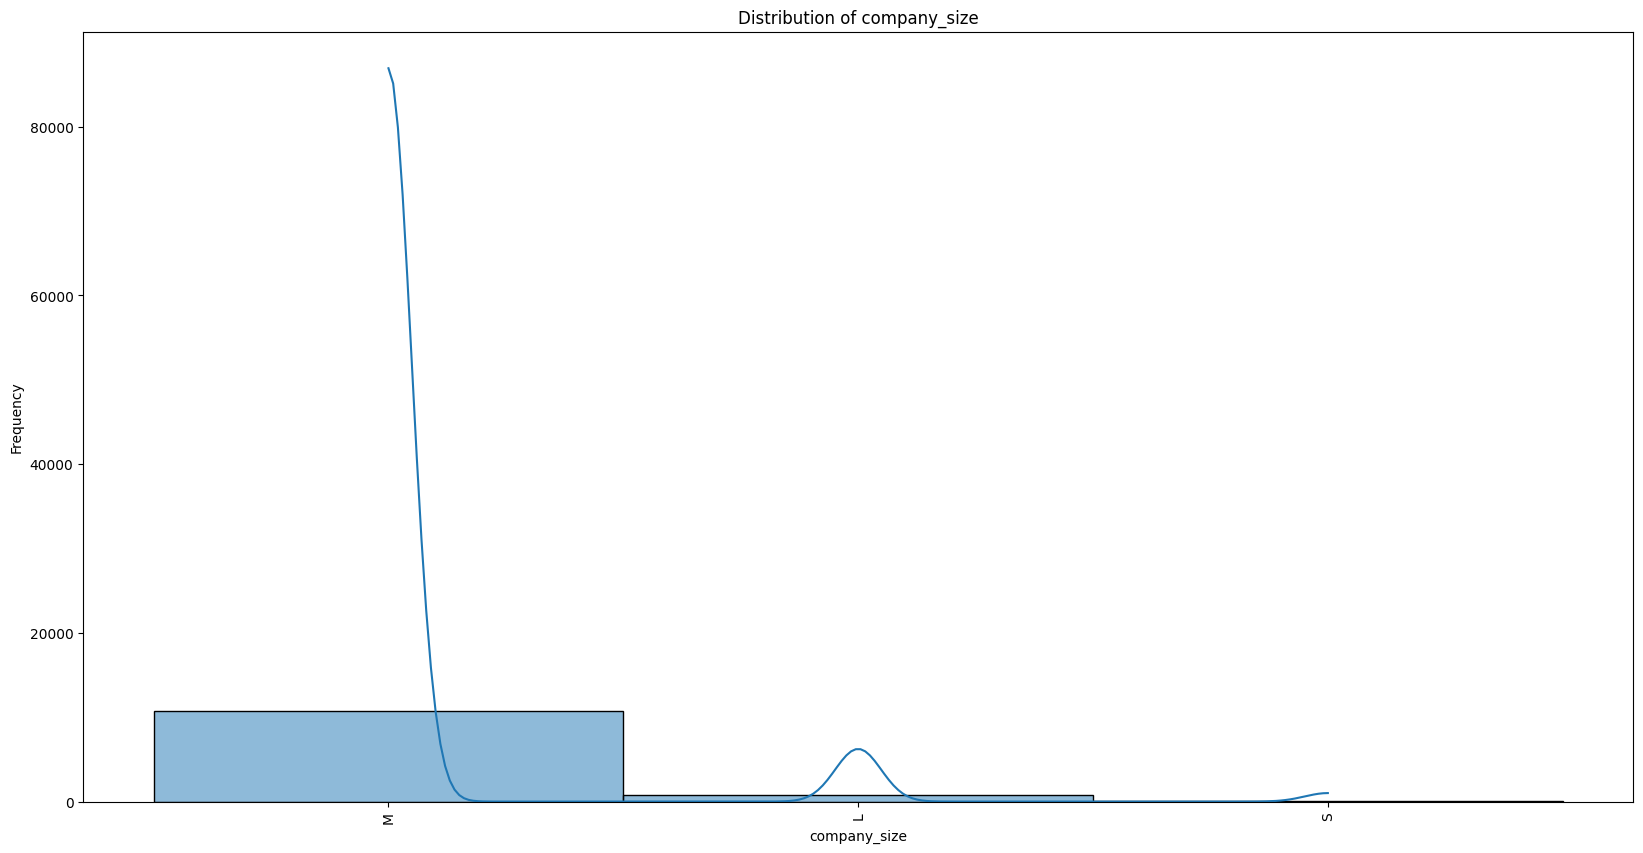

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is your DataFrame
columns = ['work_year', 'experience_level', 'employment_type',
           'salary_currency', 'employee_residence', 'remote_ratio',
           'company_location', 'company_size']

# Loop through each column and plot the histogram
for column in columns:
    plt.figure(figsize=(20, 10))
    sns.histplot(data= train, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x labels if necessary
    plt.show()


In [ ]:
df = df.drop(columns=['salary_currency'])
df = df[(df['employee_residence'] == 'US') & (df['company_location'] == 'US') & (df['employment_type'] == 'FT')]
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessor(BaseEstimator, TransformerMixin):
    # Train our custom preprocessors
    numerical_columns = [
        'remote_ratio'
    ]
    categorical_columns = [
        'work_year', 'experience_level', 'employment_type',
        'employee_residence', 'company_location', 'company_size'
    ]

    def fit(self, X, y=None):

        # Create and fit simple imputer
        self.imputer = SimpleImputer(strategy='median')
        self.imputer.fit(X[self.numerical_columns])

        # Create and fit Standard Scaler
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.numerical_columns])

        # Create and fit one hot encoder
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[self.categorical_columns])

        return self

    def transform(self, X):

        # Filter rows where 'employee_residence' and 'company_location' are 'US'
        # X = X[(X['employee_residence'] == 'US') & (X['company_location'] == 'US') & (X['employment_type'] == 'FT')]

        # Apply simple imputer
        imputed_cols = self.imputer.transform(X[self.numerical_columns])
        onehot_cols = self.onehot.transform(X[self.categorical_columns])

        # Copy the df
        transformed_df = X.copy()

        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns])

        # Drop existing categorical columns and replace with one hot equivalent
        transformed_df = transformed_df.drop(self.categorical_columns, axis=1)
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)

        return transformed_df

Imports necessary tools from the scikit-learn library: SimpleImputer for handling missing numerical data, StandardScaler for scaling numerical features, and OneHotEncoder for encoding categorical variables.
Defines a class called Preprocessor, which is a custom preprocessor inheriting from BaseEstimator and TransformerMixin, means it can be used in scikit-learn pipelines

Inside this class:

1. It lists the names of numerical and categorical columns from your dataset.
2. Initializes and fits a SimpleImputer to handle missing numerical values using median strategy.
3.Initializes and fits a StandardScaler to scale numerical features.
4. Initializes and fits a OneHotEncoder to encode categorical variables.
5. The transform() method applies the preprocessing steps to your data:
 It imputes missing numerical values using the previously fitted SimpleImputer.
It encodes categorical variables using the previously fitted OneHotEncoder.
It scales numerical features using the previously fitted StandardScaler.
It replaces the original numerical columns with the transformed ones.
It replaces the original categorical columns with their one-hot encoded equivalents.

In [ ]:
preprocessor = Preprocessor()
preprocessor.fit(train)
train_fixed = preprocessor.transform(train)

In [ ]:
train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10095 entries, 13100 to 8116
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   remote_ratio           10095 non-null  float64
 1   salary_in_usd          10095 non-null  int64  
 2   work_year_2020         10095 non-null  int64  
 3   work_year_2021         10095 non-null  int64  
 4   work_year_2022         10095 non-null  int64  
 5   work_year_2023         10095 non-null  int64  
 6   work_year_2024         10095 non-null  int64  
 7   experience_level_EN    10095 non-null  int64  
 8   experience_level_EX    10095 non-null  int64  
 9   experience_level_MI    10095 non-null  int64  
 10  experience_level_SE    10095 non-null  int64  
 11  employment_type_FT     10095 non-null  int64  
 12  employee_residence_US  10095 non-null  int64  
 13  company_location_US    10095 non-null  int64  
 14  company_size_L         10095 non-null  int64  
 15  comp

In [ ]:
train_fixed

,remote_ratio,salary_in_usd,work_year_2020,work_year_2021,work_year_2022,work_year_2023,work_year_2024,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FT,employee_residence_US,company_location_US,company_size_L,company_size_M,company_size_S
13100,-0.671105,260000,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0
14712,-0.671105,115000,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0
11954,-0.671105,175000,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0
9063,-0.671105,142200,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0
11069,1.495101,75000,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,-0.671105,127300,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0
15128,-0.671105,80000,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0
6044,-0.671105,110000,0,0,0,0,1,1,0,0,0,1,1,1,0,1,0
954,-0.671105,155700,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0


In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.9 MB/s eta 0:00:00


In [ ]:
import os
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/gourimenon8/Python_project.mlflow'
os.environ['MLFLOW_TRACKING_USERNAME'] = 'gourimenon8'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '8ab2cd5b45a51508f012ed29fd3d7ba0f26545f6'

In [ ]:
# Import MLFlow
import mlflow
import mlflow.sklearn

# Set the tracking URI to Dagshub
mlflow.set_tracking_uri('https://dagshub.com/gourimenon8/Python_project.mlflow ')
mlflow.set_experiment('Salary Prediction Experiments')

<Experiment: artifact_location='mlflow-artifacts:/4456d53952104a26bd13be4c96368b69', creation_time=1715840064115, experiment_id='0', last_update_time=1715840064115, lifecycle_stage='active', name='Salary Prediction Experiments', tags={}>

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
rfr = make_pipeline(Preprocessor(), RandomForestRegressor(n_estimators=50))

In [ ]:
rfr

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [ ]:
y_train = train['salary_in_usd']
X_train = train.drop('salary_in_usd', axis=1)
rfr.fit(X_train, y_train)


Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [ ]:
params = rfr.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor(n_estimators=50))],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'randomforestregressor': RandomForestRegressor(n_estimators=50),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 50,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'randomforestregressor__verbose': 0,
 'randomfore

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_hat=rfr.predict(X_train)
print(mean_squared_error(y_train, y_train_hat))
print(mean_absolute_error(y_train, y_train_hat))

3780468080.423343
45458.02599321753


In [ ]:
y_test = test['salary_in_usd']
X_test = test.drop('salary_in_usd', axis=1)

In [ ]:
y_test_hat=rfr.predict(X_test)
rm2e = mean_squared_error(y_test, y_test_hat)
mae = mean_absolute_error(y_test, y_test_hat)

In [ ]:
import mlflow
from mlflow.models import infer_signature

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rm2e)
    mlflow.log_metric("mean_absolute_error", mae)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RandomForestRegressor model for housing data, n_estimators=50")

    # Infer the model signature
    signature = infer_signature(X_train, rfr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rfr,
        artifact_path="housing_model",
        signature=signature,
        input_example=preprocessor.transform(X_train),
        registered_model_name="rfr_moodel_n_estimators=50",
    )

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'rfr_moodel_n_estimators=50' already exists. Creating a n

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor  # Change to LazyClassifier for classification

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Display the top models
models

 76%|███████▌  | 32/42 [01:38<00:15,  1.59s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [01:49<00:00,  2.60s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 10095, number of used features: 12
[LightGBM] [Info] Start training from score 157293.450421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoCV,0.10,0.10,61763.31,0.41
LarsCV,0.10,0.10,61765.45,0.06
LassoLarsCV,0.10,0.10,61765.45,0.09
LassoLarsIC,0.10,0.10,61768.78,0.05
BayesianRidge,0.10,0.10,61770.86,0.10
LGBMRegressor,0.09,0.10,61773.68,0.17
RidgeCV,0.09,0.10,61775.93,0.04
LassoLars,0.09,0.10,61776.45,0.06
Ridge,0.09,0.10,61776.47,0.03


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the tracking URI to your MLFlow server
mlflow.set_tracking_uri('https://dagshub.com/gourimenon8/Python_project.mlflow')
mlflow.set_experiment('Salary Prediction Experiments')

# Prepare data
preprocessor = Preprocessor()
preprocessor.fit(train)

X_train = preprocessor.transform(train.drop('salary_in_usd', axis=1))
y_train = train['salary_in_usd']
X_test = preprocessor.transform(test.drop('salary_in_usd', axis=1))
y_test = test['salary_in_usd']
def log_model(model, model_name):
    with mlflow.start_run():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on train and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        metrics = {
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_r2': train_r2,
            'test_r2': test_r2
        }

        # Log parameters and metrics
        mlflow.log_params(model.get_params())
        mlflow.log_metrics(metrics)

        # Log the model
        mlflow.sklearn.log_model(model, model_name)

        print(f"Logged model {model_name} to MLFlow")
        print(f"Metrics:\n{metrics}")
    # Initialize models
rf = RandomForestRegressor(n_estimators=50, random_state=42)
gb = GradientBoostingRegressor(n_estimators=50, random_state=42)
xgb = XGBRegressor(n_estimators=50, random_state=42)

# Log models to MLFlow
log_model(rf, "RandomForestRegressor")
log_model(gb, "GradientBoostingRegressor")
log_model(xgb, "XGBRegressor")


Logged model RandomForestRegressor to MLFlow
Metrics:
{'train_mae': 45480.46553787935, 'test_mae': 45489.021196110254, 'train_mse': 3780649502.836734, 'test_mse': 3824048786.3718233, 'train_rmse': 61486.986451091696, 'test_rmse': 61838.893799710095, 'train_r2': 0.12481894094714585, 'test_r2': 0.09636525364806003}
Logged model GradientBoostingRegressor to MLFlow
Metrics:
{'train_mae': 45596.19773039524, 'test_mae': 45367.78258606697, 'train_mse': 3794957235.5203233, 'test_mse': 3810156864.843422, 'train_rmse': 61603.224229907995, 'test_rmse': 61726.46810601933, 'train_r2': 0.12150684956356916, 'test_r2': 0.09964795836443174}
Logged model XGBRegressor to MLFlow
Metrics:
{'train_mae': 45413.47557655399, 'test_mae': 45450.64682336203, 'train_mse': 3778364059.6966043, 'test_mse': 3823877898.619092, 'train_rmse': 61468.3988704489, 'test_rmse': 61837.51206686029, 'train_r2': 0.12534799727629853, 'test_r2': 0.09640563496109256}


In [ ]:
!pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 937.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the tracking URI to your MLFlow server
mlflow.set_tracking_uri('https://dagshub.com/gourimenon8/Python_project.mlflow')
mlflow.set_experiment('Salary Prediction Experiments')

# Prepare data
preprocessor = Preprocessor()
preprocessor.fit(train)

X_train = preprocessor.transform(train.drop('salary_in_usd', axis=1))
y_train = train['salary_in_usd']
X_test = preprocessor.transform(test.drop('salary_in_usd', axis=1))
y_test = test['salary_in_usd']
def log_model(model, model_name):
    with mlflow.start_run():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on train and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        metrics = {
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_r2': train_r2,
            'test_r2': test_r2
        }

        # Log parameters and metrics
        mlflow.log_params(model.get_params())
        mlflow.log_metrics(metrics)

        # Log the model
        mlflow.sklearn.log_model(model, model_name)

        print(f"Logged model {model_name} to MLFlow")
        print(f"Metrics:\n{metrics}")
    # Initialize models
rf = RandomForestRegressor(n_estimators=50, random_state=42)
gb = GradientBoostingRegressor(n_estimators=50, random_state=42)
xgb = XGBRegressor(n_estimators=50, random_state=42)

# Log models to MLFlow
log_model(rf, "RandomForestRegressor")
log_model(gb, "GradientBoostingRegressor")
log_model(xgb, "XGBRegressor")


Logged model RandomForestRegressor to MLFlow
Metrics:
{'train_mae': 45480.46553787935, 'test_mae': 45489.021196110254, 'train_mse': 3780649502.836734, 'test_mse': 3824048786.3718233, 'train_rmse': 61486.986451091696, 'test_rmse': 61838.893799710095, 'train_r2': 0.12481894094714585, 'test_r2': 0.09636525364806003}
Logged model GradientBoostingRegressor to MLFlow
Metrics:
{'train_mae': 45596.19773039524, 'test_mae': 45367.78258606697, 'train_mse': 3794957235.5203233, 'test_mse': 3810156864.843422, 'train_rmse': 61603.224229907995, 'test_rmse': 61726.46810601933, 'train_r2': 0.12150684956356916, 'test_r2': 0.09964795836443174}
Logged model XGBRegressor to MLFlow
Metrics:
{'train_mae': 45413.47557655399, 'test_mae': 45450.64682336203, 'train_mse': 3778364059.6966043, 'test_mse': 3823877898.619092, 'train_rmse': 61468.3988704489, 'test_rmse': 61837.51206686029, 'train_r2': 0.12534799727629853, 'test_r2': 0.09640563496109256}
